In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
from timer import Timer

In [10]:
def buildTree(S, vol, T, N):
    dt = T / N
    matrix = np.zeros((N + 1, N + 1))
    matrix[0, 0] = S
    u = np.exp(vol * np.sqrt(dt))
    d = np.exp(-vol * np.sqrt(dt))
    
    for i in np.arange(N + 1):
        for j in np.arange(i + 1):
            matrix[i, j] = S * u**(j) * d**(i - j)
    return matrix

def valueOptionMatrix(tree, T, r, K, vol, N):
    dt = T / N
    u = np.exp(vol * np.sqrt(dt))
    d = np.exp(-vol * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)
    columns = tree.shape[1]
    rows = tree.shape[0]

    # Print the original tree for reference
    #print(tree)

    # Walk backward, add the payoff function in the last row
    for c in np.arange(columns):
        S = tree[rows - 1, c]
        tree[rows - 1, c] = max(S - K, 0)

    # For all other rows, combine from previous rows
    for i in np.arange(rows - 1)[::-1]:
        for j in np.arange(i + 1):
            down = tree[i + 1, j]
            up = tree[i + 1, j + 1]
            tree[i, j] = np.exp(-r * dt) * (p * up + (1 - p) * down)


    return tree

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price, norm.cdf(d1)

def hedge_param(tree, option_tree):
    delta = (option_tree[1,1] - option_tree[1,0]) / (tree[1,1] - tree[1,0])
    # print(option_tree[1,1], option_tree[1,0], tree[1,1], tree[1,0])
    return delta



In [11]:
S = 100
T = 1.
N = 50
K = 99
r = 0.06
sigma = 0.2

In [12]:
print("Value of european call option using binomial tree with N=50: ", valueOptionMatrix(buildTree(S, sigma, T, N), T, r, K, sigma, N)[0, 0])

Value of european call option using binomial tree with N=50:  11.546434850755071


In [13]:
N = np.arange(1 , 300)
optionPriceAnalytical = black_scholes_call(S, K, T, r, sigma)[0] 
f0s = []
time_run = []


In [14]:
for n in N:
    
    t = Timer()
    t.start()
    treeN = buildTree(S, sigma, T, n) # TODO
    priceApproximatedly = valueOptionMatrix(treeN, T, r, K, sigma, n)
    time_run.append(t.stop())
    f0s.append(priceApproximatedly[0,0])


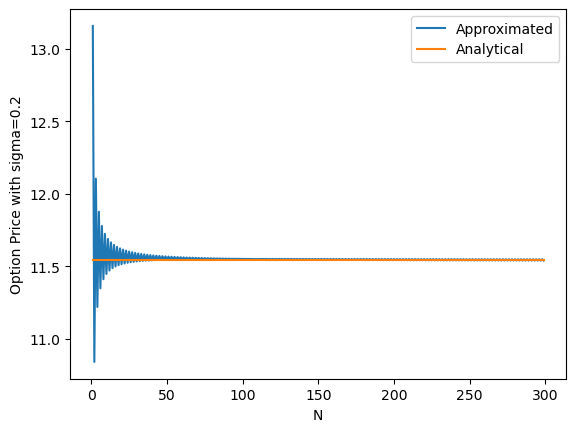

In [15]:
plt.plot(N, f0s, label='Approximated')
plt.plot(N, optionPriceAnalytical*np.ones(len(N)), label='Analytical')
plt.xlabel('N')
plt.ylabel('Option Price with sigma=0.2')
plt.legend()
plt.show()


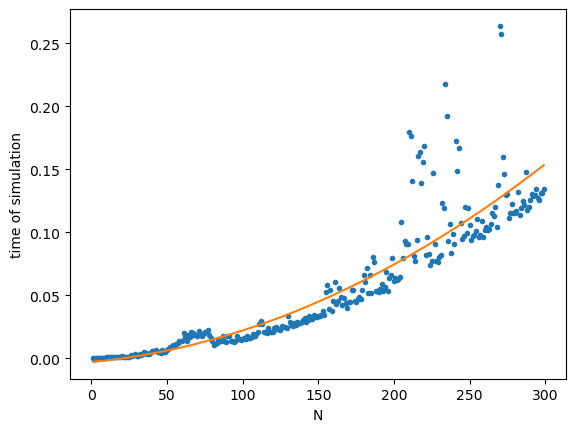

In [16]:
plt.plot(N, time_run, '.')
plt.plot(N, np.poly1d(np.polyfit(N, time_run, 2))(N))
plt.xlabel('N')
plt.ylabel('time of simulation')
plt.show()